In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import pi

{'11': 2048}


D:\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


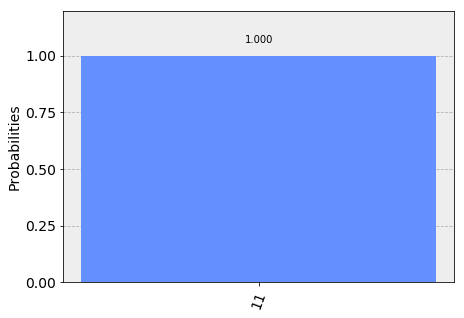

In [3]:
#N=4,M=1,d0=3,|psi>=1/2[1,1,1,1]
phi=pi
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.h(qr[1])
qc.h(qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.cu1(phi,qr[1],qr[0])
    
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 2029, '10': 2067}


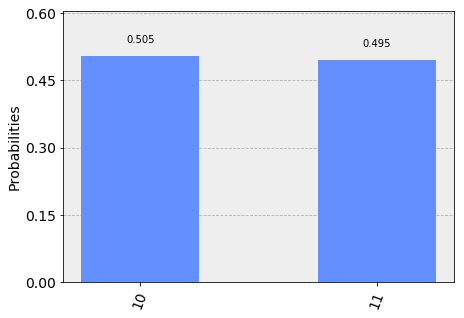

In [56]:
#N=4,M=2,d0=2,|psi>=1/2[1,1,1,1]
phi=pi/2
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.h(qr[1])
qc.h(qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=4096)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 1265, '10': 1412, '01': 1419}


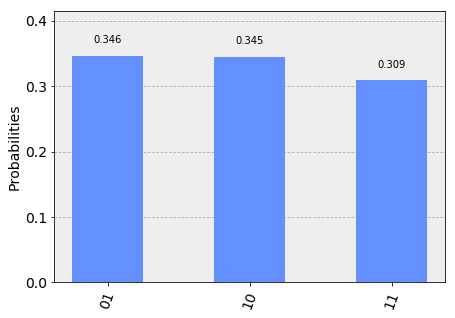

In [49]:
#N=4,M=3,d0=1,|psi>=1/2*[1,1,1,1]
phi=1.2310
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.h(qr[1])
qc.h(qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.x(qr[1])
    qc.cu1(phi,qr[1],qr[0])
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.h(qr[1])
    qc.h(qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=4096)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 1907, '10': 73, '01': 68}


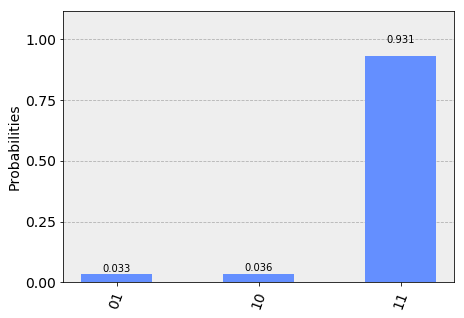

In [51]:
#3 N=3,M=1,d0=3,|psi>=1/2[0,1,1,1]
phi=pi
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.x(qr[1])
qc.cx(qr[1],qr[0])
qc.x(qr[1])
qc.ch(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.cu1(phi,qr[1],qr[0])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 1896, '10': 84, '00': 68}


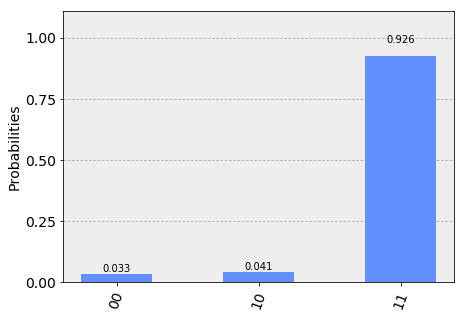

In [58]:
#4 N=3,M=1,d0=3,|psi>=1/2[1,0,1,1]
phi=pi
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.ch(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.cu1(phi,qr[1],qr[0])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'10': 1898, '00': 89, '01': 61}


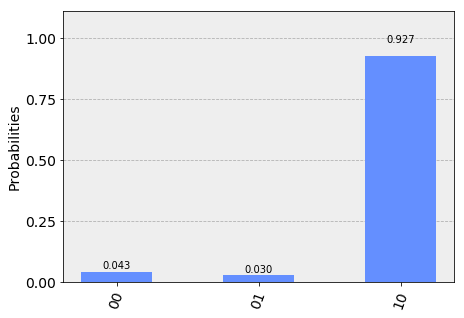

In [19]:
#6 N=3,M=2,d0=2,|psi>=1/2[1,1,1,0]
phi=pi/2
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.2310,qr[1])
qc.x(qr[1])
qc.ch(qr[1],qr[0])
qc.x(qr[1])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    
    #Hn
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.2310,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.2310,qr[1])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 960, '10': 1001, '00': 87}


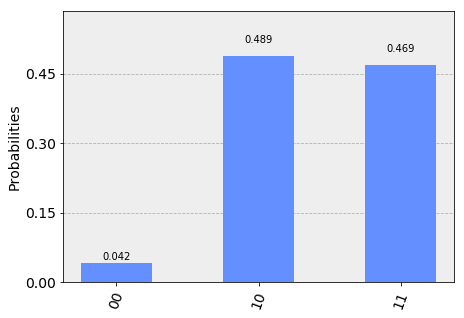

In [20]:
#7 N=3,M=2,d0=2,|psi>=1/2[1,0,1,1]
phi=pi/2
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.ch(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 1007, '10': 952, '01': 89}


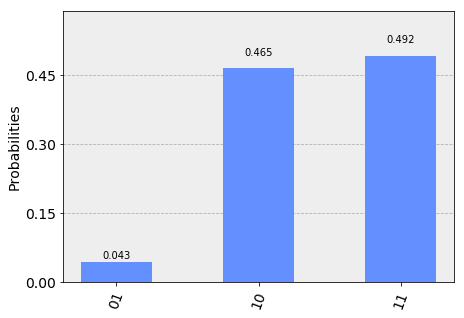

In [21]:
#8 N=3,M=2,d0=2,|psi>=1/2[0,1,1,1]
phi=pi/2
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.x(qr[1])
qc.cx(qr[1],qr[0])
qc.x(qr[1])
qc.ch(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 700, '10': 677, '01': 671}


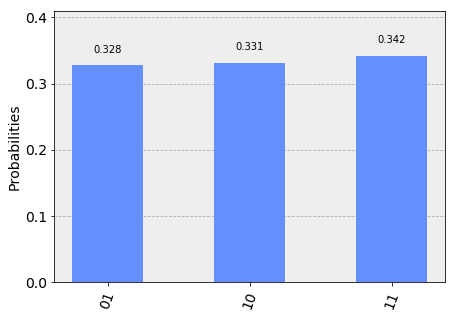

In [24]:
#9 N=3,M=3,d0=1,|psi>=1/2[0,1,1,1]
phi=1.2310
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.x(qr[1])
qc.cx(qr[1],qr[0])
qc.x(qr[1])
qc.ch(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    qc.x(qr[1])
    qc.cu1(phi,qr[1],qr[0])
    qc.x(qr[1])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'11': 1000, '00': 10, '01': 1038}


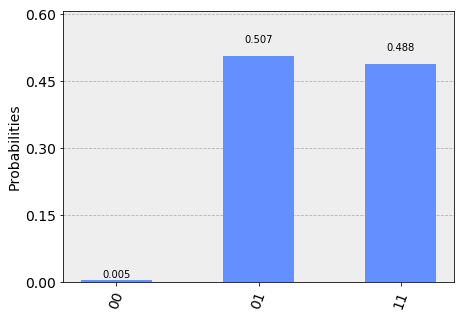

In [31]:
# 10 N=3,M=3,d0=1,|psi>=1/2[1,1,0,1]
phi=2*np.arcsin(np.sqrt(1/3))
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.2310,qr[1])
qc.x(qr[1])
qc.ch(qr[1],qr[0])
qc.x(qr[1])
qc.cx(qr[1],qr[0])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    qc.x(qr[1])
    qc.cu1(phi,qr[1],qr[0])
    qc.x(qr[1])
    
    #Hn
    qc.cx(qr[1],qr[0])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.2310,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.2310,qr[1])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.cx(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'01': 1039, '10': 1002, '00': 7}


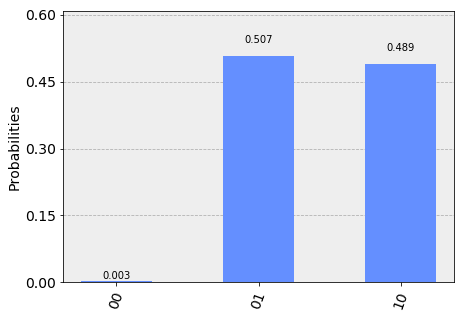

In [32]:
# 11 N=3,M=3,d0=1,|psi>=1/2[1,1,1,0]
phi=2*np.arcsin(np.sqrt(1/3))
J=0
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.2310,qr[1])
qc.x(qr[1])
qc.ch(qr[1],qr[0])
qc.x(qr[1])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[1])
    qc.x(qr[1])
    qc.cu1(phi,qr[1],qr[0])
    qc.x(qr[1])
    
    #Hn
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])
    qc.ry(-1.2310,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.2310,qr[1])
    qc.x(qr[1])
    qc.ch(qr[1],qr[0])
    qc.x(qr[1])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

In [ ]:
IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 16 and
                                                       not x.configuration().simulator)
#backend = least_busy(large_enough_devices)
backend = IBMQ.get_backend('ibmqx4') 
print(backend)

shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

Available backends: [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]
ibmqx4


HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Got a 502 code response to /api/Jobs/5cbfd8f949679f007a76f759/status: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to /api/Jobs/5cbfd8f949679f007a76f759/status: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to /api/Jobs/5cbfd8f949679f007a76f759/status: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to /api/Jobs/5cbfd8f949679f007a76f759/status: 502 Bad Gateway: Registered endpoint failed to handle the request.



In [46]:
print(backend)

ibmqx4
